# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | svetlaya
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cobija
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | seoul
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | usinsk
Processing Record 14 of Set 1 | aquiraz
Processing Record 15 of Set 1 | buritis
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | mawlaik
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1 | brumadinho
Processing Record 24 of Set 1 | k

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,17.10,78,2,2.99,ZA,1680296650
1,svetlaya,46.5389,138.3297,0.74,67,1,2.33,RU,1680296650
2,bethel,41.3712,-73.4140,9.45,57,100,2.57,US,1680296650
3,ushuaia,-54.8000,-68.3000,9.81,62,40,2.06,AR,1680296651
4,cobija,-11.0267,-68.7692,29.10,79,75,0.00,BO,1680296651


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,17.10,78,2,2.99,ZA,1680296650
1,svetlaya,46.5389,138.3297,0.74,67,1,2.33,RU,1680296650
2,bethel,41.3712,-73.4140,9.45,57,100,2.57,US,1680296650
3,ushuaia,-54.8000,-68.3000,9.81,62,40,2.06,AR,1680296651
4,cobija,-11.0267,-68.7692,29.10,79,75,0.00,BO,1680296651


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

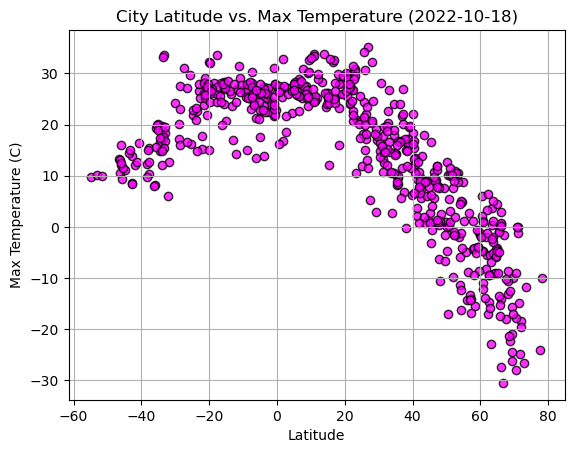

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latVsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

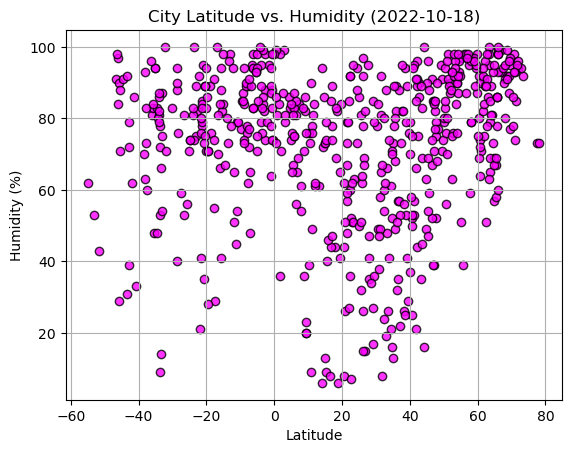

In [24]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latVsHumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

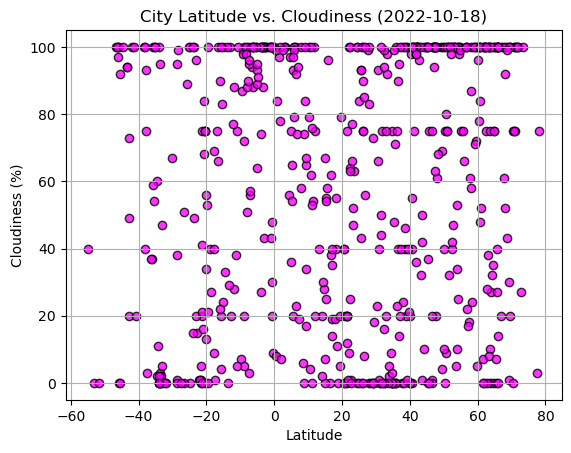

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

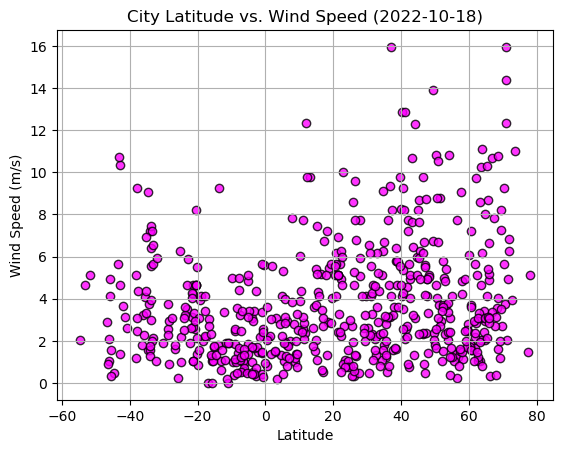

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latVsWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title,x_label, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Calculate the correlation coefficient
    cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
    
    # Get the equation of the line
    line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    date = datetime.date(datetime.now())
    plt.title(f'{title} Hemisphere City {x_label} vs. {y_label} {date}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    print(f"The correlation coefficient is: {cor_coef}")

    print(f"The r-value is: {round(rvalue**2,2)}")

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,svetlaya,46.5389,138.3297,0.74,67,1,2.33,RU,1680296650
2,bethel,41.3712,-73.4140,9.45,57,100,2.57,US,1680296650
5,chokurdakh,70.6333,147.9167,-27.97,98,100,3.77,RU,1680296651
7,seoul,37.5683,126.9778,6.78,82,0,1.54,KR,1680296079
8,hilo,19.7297,-155.0900,25.90,84,79,4.02,US,1680296421


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,17.10,78,2,2.99,ZA,1680296650
3,ushuaia,-54.8000,-68.3000,9.81,62,40,2.06,AR,1680296651
4,cobija,-11.0267,-68.7692,29.10,79,75,0.00,BO,1680296651
6,rikitea,-23.1203,-134.9692,26.48,75,96,3.53,PF,1680296651
9,lebu,-37.6167,-73.6500,15.43,60,3,4.35,CL,1680296651


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.89
The r-value is: 0.79


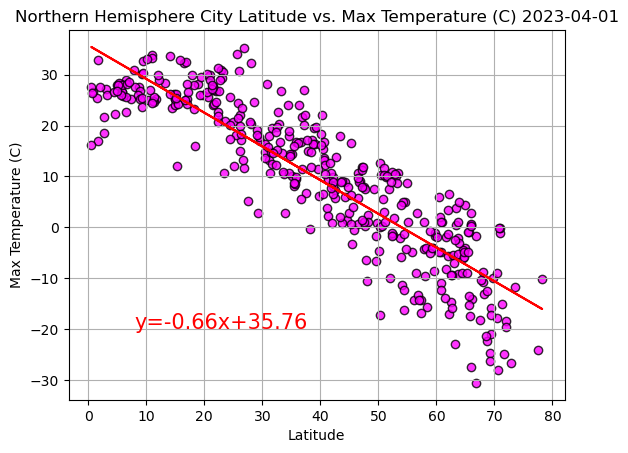

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Max Temperature (C)',(8,-20))
# Save the figure
plt.savefig("output_data/NorthlatVsMaxTemp.png")

# Show plot
plt.show()


The correlation coefficient is: 0.67
The r-value is: 0.45


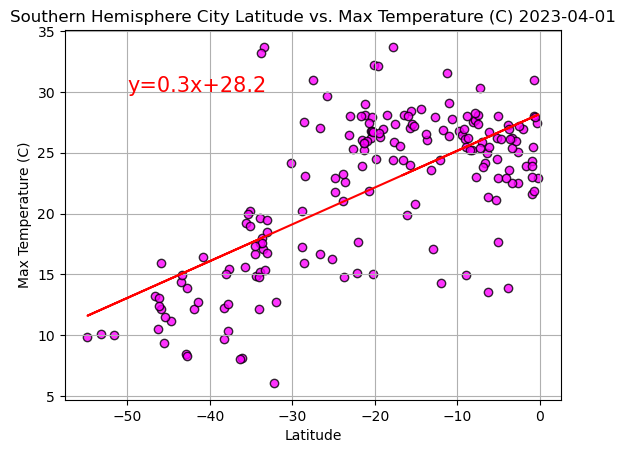

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Max Temperature (C)',(-50,30))
# Save the figure
plt.savefig("output_data/SouthLatVsMaxTemp.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 
The linear relationship we find when comparing the northern and southern hemispheres max temperature is just what you would expect. The closer we are to the equator (Latitude = 0) the higher our max temperature will be. 

In the northern hemisphere we have a negative correlation coefficient which is to be expected considering our x-axis (Latitude) is moving further from the equator. We do have a very strong linear relationship between our dependant and independant variables as shown in our R-value of 0.79. 

In the southern hemisphere we have a positive correlation coefficient, but our linear relationship is not as strong as the northern hemisphere with an R-value of 0.45. When we take a closer look at our variables we can see that some of our dependant variables (Max Temperature), despite being so close to the equator, were not that high. This could be a result of what time of year the data was polled at or just a case of the city being in a higher elevation. 

These two data plots overall have very positive linear relationships between the two variables.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.36
The r-value is: 0.13


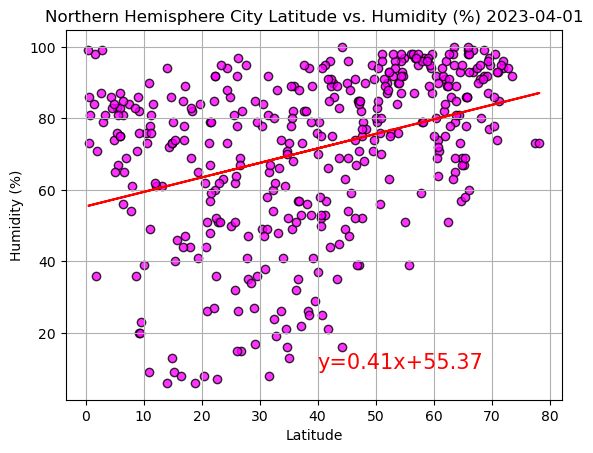

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Humidity (%)',(40,10))

# Save the figure
plt.savefig("output_data/NorthLatVsHumidity.png")

# Show plot
plt.show()

The correlation coefficient is: 0.27
The r-value is: 0.07


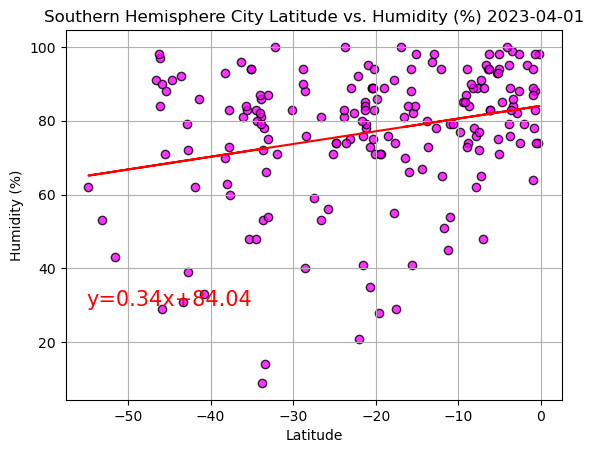

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Humidity (%)',(-55,30))

# Save the figure
plt.savefig("output_data/SouthLatVsHumidity.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationship we have when looking at humidity percentages across the southern and northern hemispheres is not as strong as our temperatures. In the northern hemisphere the linear relationship is slightly more positive than the southern hemisphere with an R-value of 0.13. This means we barely have a linear relationship existing. The R-values in both data sets are so close to absolute zero that it is hard to justify that the 2 variables are correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.15
The r-value is: 0.02


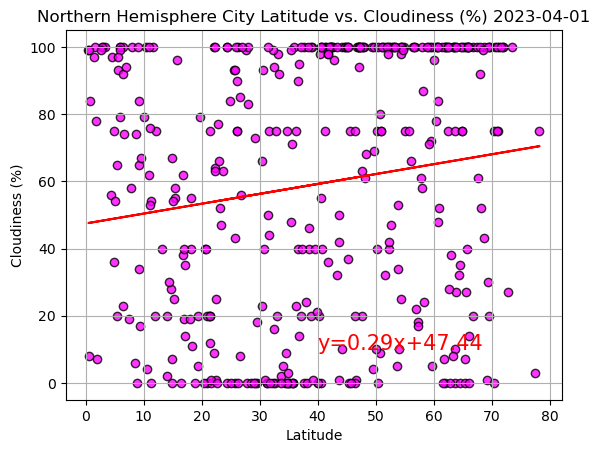

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Cloudiness (%)',(40,10))

# Save the figure
plt.savefig("output_data/NorthLatVsCloudiness.png")

# Show plot
plt.show()

The correlation coefficient is: 0.26
The r-value is: 0.07


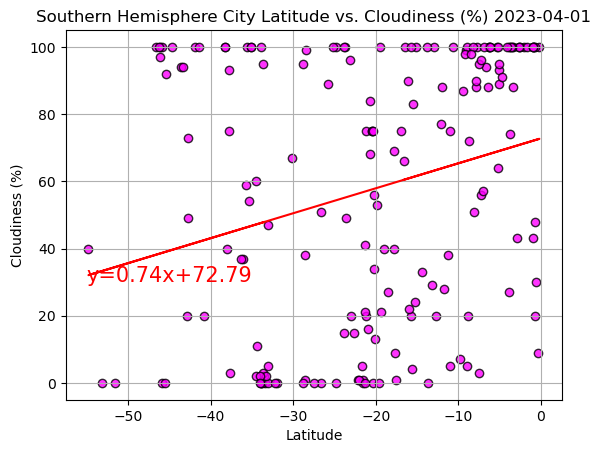

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Cloudiness (%)',(-55,30))

# Save the figure
plt.savefig("output_data/SouthLatVsCloudiness.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationship we have when looking at cloudiness percentages across the southern and northern hemispheres is also close to no correlation. We still have positive R-values for both northern and southern hemispheres, but being so close to zero and with the observable data in our scatter plots we can justify there is no correlation between our two variables


### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.17
The r-value is: 0.03


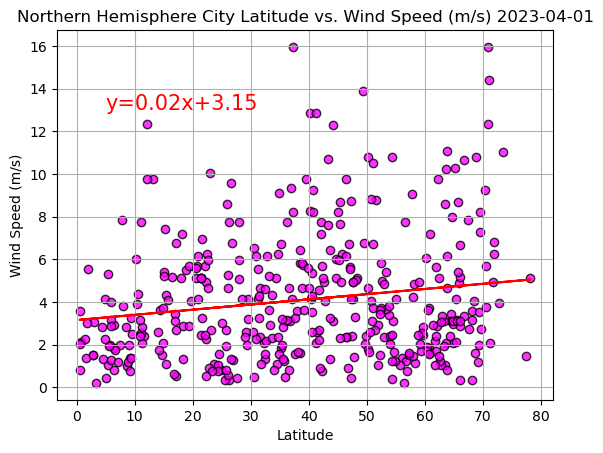

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Wind Speed (m/s)',(5,13))

# Save the figure
plt.savefig("output_data/NorthLatVsWindSpeed.png")

# Show plot
plt.show()

The correlation coefficient is: -0.34
The r-value is: 0.11


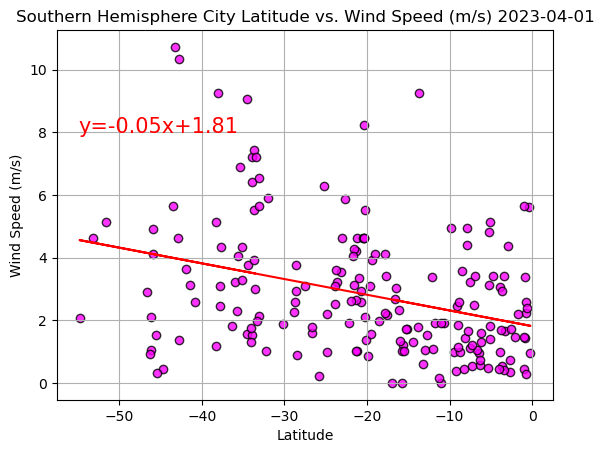

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Wind Speed (m/s)',(-55,8))

# Save the figure
plt.savefig("output_data/SouthLatVsWindSpeed.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear relationship we have when looking at wind speeds across the southern and northern hemispheres is also close to no correlation. We still have positive R-values for both northern and southern hemispheres, but being so close to zero and with the observable data in our scatter plots we can justify there is no correlation between our two variables. The observable data does show that our wind speed is grouped more consistantly the closer it is to the equator. 